In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import Image

In [5]:
def objective_function(x):
    return np.sum(x**2)

def init(pop_size,dim,bounds):
    return np.random.uniform(bounds[0],bounds[1],(pop_size,dim))

def selection(population):
    ind = np.random.choice(population.shape[0],3,replace=False)
    return population[ind]

def mutation(parents,f,bounds):
    r1,r2,r3 = parents
    mutant = r1 + f*(r2-r1)
    return np.clip(mutant,bounds[0],bounds[1])

def crossover(target,mutant,cr):
    trial = np.copy(target)
    for j in range(len(target)):
        if np.random.rand() < cr or j == np.random.randint(len(target)):
            trial[j] = mutant[j]
    return trial

def survival(population,trial,target,objective_function):
    if(objective_function(trial) < objective_function(target)):
        return trial
    else:
        return target

In [13]:
def differential_evolution(objective_function,pop_size,dim,bounds,n_gen,f,cr):
    pop = init(pop_size,dim,bounds)
    his = []
    his.append(np.array(pop))

    for gen in range(n_gen):
        new_pop = []

        for i in range(pop_size):
            parents = selection(pop)
            mutant = mutation(parents,f,bounds)
            trial = crossover(pop[i],mutant,cr)
            new_individual = survival(pop,trial,pop[i],objective_function)
            new_pop.append(new_individual)

        pop = np.array(new_pop)
        his.append(np.copy(pop))

    best_solution = pop[np.argmin([objective_function(ind) for ind in pop])]
    return best_solution,his


def vis_his(his, bounds, objective_function):
    fig, ax = plt.subplots(figsize=(8, 6))

    x = np.linspace(bounds[0], bounds[1], 100)
    y = np.linspace(bounds[0], bounds[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = np.array([[objective_function(np.array([xi, yi])) for xi, yi in zip(x_row, y_row)] for x_row, y_row in zip(X, Y)])
    
    ax.contourf(X, Y, Z, levels=50, cmap='viridis')
    scat = ax.scatter([], [], color='red', s=10)

    ax.set_title("Differential Evolution Optimization")
    ax.set_xlabel("x1")
    ax.set_ylabel("y1")

    def update(frame):
        pop = his[frame]
        scat.set_offsets(pop)
        ax.set_title(f"Generation {frame}")
        return scat,

    ani = FuncAnimation(fig,update,frames=len(his),interval=200,blit=True)
    plt.show()

    gif_path = "C:/Users/Vaibhav Singh Takuli/vscode/py lang/differential_evolution.gif"
    ani.save(gif_path, writer=PillowWriter(fps=5))
    plt.close(fig)

    return Image(gif_path)


Best Solution: [ 0.00655065 -0.00676516]
Best Fitness: 8.86784078511981e-05


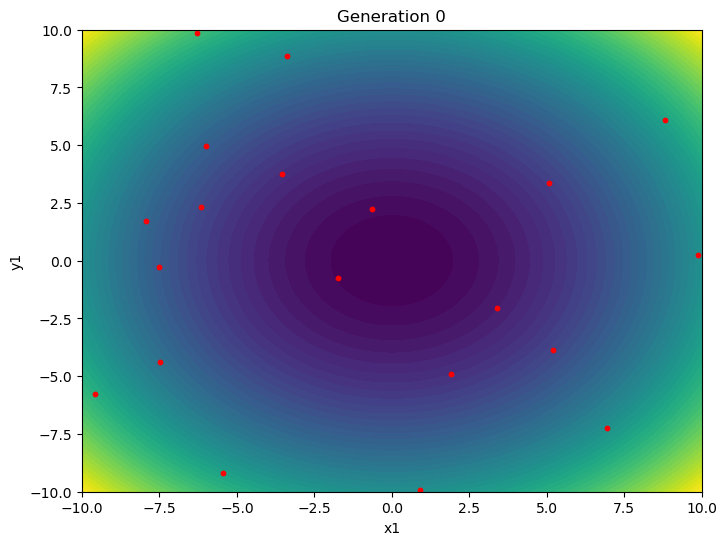

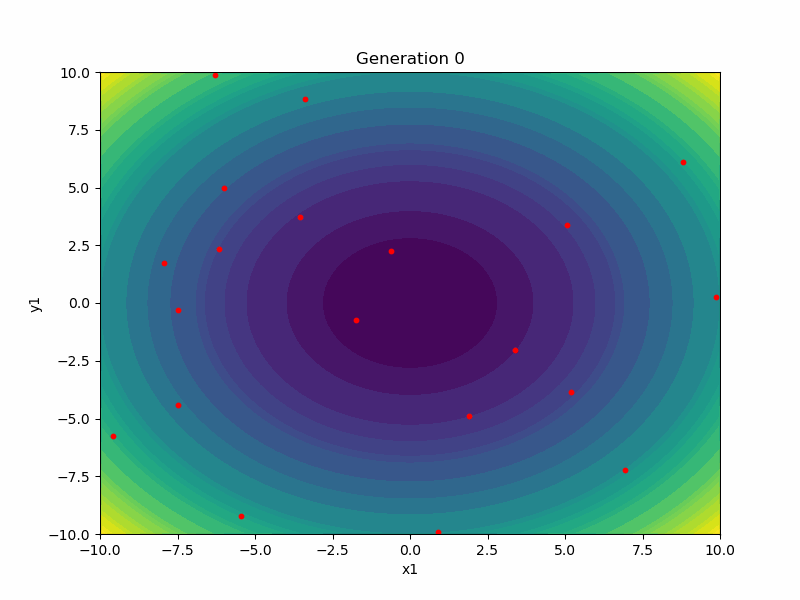

In [14]:
pop_size = 20
dim = 2
bounds = (-10,10)
n_gen = 50
f = 0.8
cr = 0.7

best_solution,his = differential_evolution(objective_function,pop_size,dim,bounds,n_gen,f,cr)
print("Best Solution:", best_solution)
print("Best Fitness:", objective_function(best_solution))

gif_image = vis_his(his,bounds,objective_function=objective_function)
gif_image